# **Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4th Sem/ML/Data Sets/placement 2.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,:1],df.iloc[:,-1],random_state=42)
clf = LinearRegression()
clf.fit(X_train,Y_train)

LinearRegression()

In [ ]:
X = pd.DataFrame()
y_pred = clf.predict(X_test)
mean_absolute_error(Y_test,y_pred)

0.24266327437416052

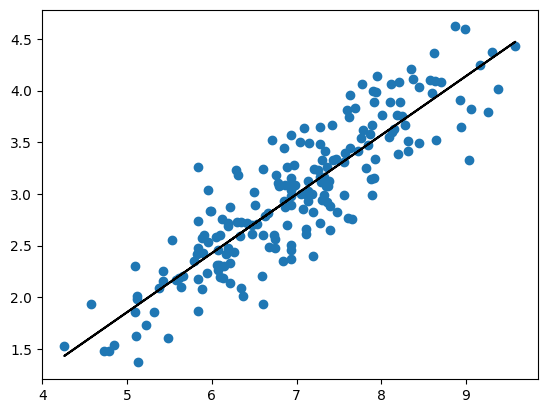

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(df['cgpa'],clf.predict(df[['cgpa']]),color='black')

# **Non-Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

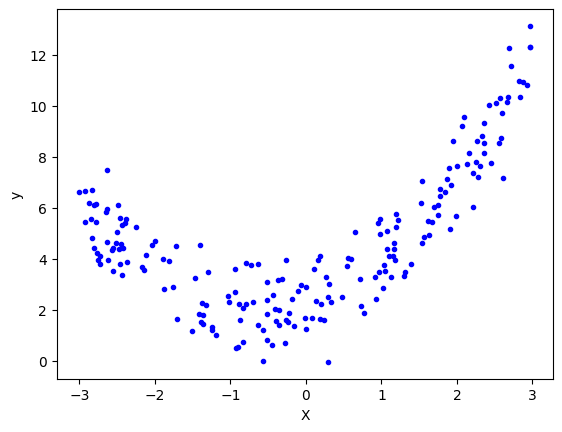

In [ ]:
# y = 0.8x^2 + 0.9x + 2
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
#non linear and noisy dataset
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.23462548657465487

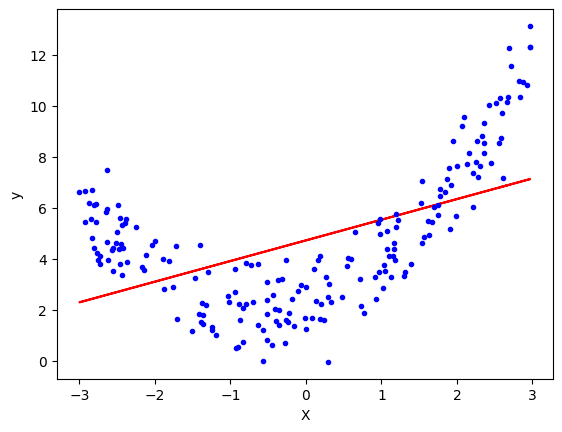

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=False)
print(X_train)
X_train_trans = poly.fit_transform(X_train)
print(X_train_trans)
X_test_trans = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
print(X_new)
X_new_poly = poly.transform(X_new)
print(X_new_poly)
y_new = lr.predict(X_new_poly)

[[ 2.66386104e+00]
 [ 1.91706431e+00]
 [ 2.27629543e+00]
 [-2.43067294e+00]
 [ 5.45873398e-01]
 [-2.48002759e+00]
 [ 1.95390563e+00]
 [ 1.89937832e+00]
 [-5.18811386e-01]
 [-8.34027601e-01]
 [ 2.44618944e+00]
 [-1.40423755e+00]
 [ 1.08059706e+00]
 [ 1.74603424e+00]
 [ 1.91173597e+00]
 [-2.45968252e+00]
 [ 2.82515245e+00]
 [-1.47230556e+00]
 [ 2.67350699e+00]
 [ 1.62819010e+00]
 [-2.37417860e+00]
 [-1.24045419e+00]
 [-2.59345140e-01]
 [ 1.16554027e+00]
 [-6.73901909e-02]
 [ 2.26763621e+00]
 [-2.65133755e+00]
 [ 1.54378286e+00]
 [-1.01780973e+00]
 [ 9.15458237e-01]
 [-8.90163964e-01]
 [-1.87367000e+00]
 [-2.71965744e+00]
 [-2.55625122e+00]
 [ 2.55450336e+00]
 [ 1.18344416e+00]
 [-9.39354584e-01]
 [-1.37532441e+00]
 [-1.36123977e+00]
 [-1.31964922e+00]
 [ 1.11885283e-01]
 [-2.17399192e+00]
 [ 8.01007617e-02]
 [ 1.07489987e+00]
 [-2.78136840e+00]
 [-2.37708188e+00]
 [-4.08221067e-01]
 [ 2.25475037e+00]
 [ 7.68305471e-01]
 [ 2.06631342e+00]
 [-1.03110706e-01]
 [-2.14270636e+00]
 [ 9.6080438

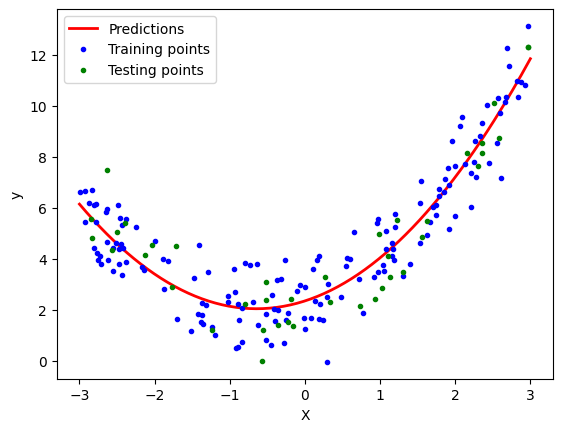

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=1)
    plt.plot(X_train, y_train, "b.", linewidth=1)
    plt.plot(X_test, y_test, "g.", linewidth=1)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

In [ ]:
# Applying Gradient Descent
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=100)

In [ ]:
X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)
y_pred = sgd.predict(X_test_trans)

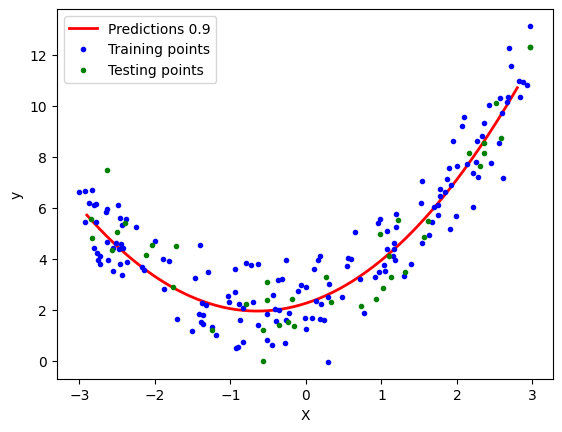

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Ridge Regression**

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
X = np.random.rand(100, 1)
Y = 1 + 2 * X + 0.1 * np.random.randn(100, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
alphas = [0, 1, 10]

In [ ]:
plt.figure(figsize=(10, 5))
for i, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, Y_train)
  Y_pred = ridge.predict(X_test)
  mse = mean_squared_error(Y_test, Y_pred)
  print(mse)

0.009177532469714297
0.011812301566012281
0.08484919448052423


<Figure size 1000x500 with 0 Axes>

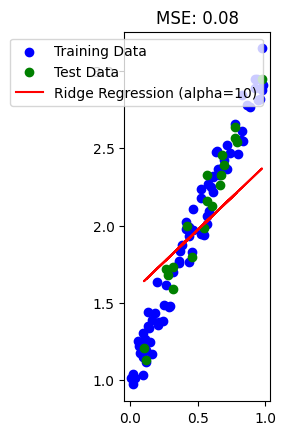

In [ ]:
plt.subplot(1, len(alphas), i + 1)
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='green', label='Test Data')
plt.plot(X_test, Y_pred, color='red', label=f'Ridge Regression (alpha={alpha})')
plt.title(f'MSE: {mse:.2f}')
plt.legend()
plt.show()

# **Lasso Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

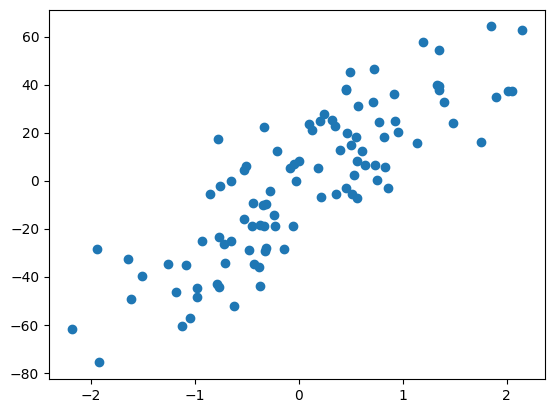

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1,
n_targets=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[26.95641342]
-3.0742555530595714


<ipython-input-49-7c3f7e8b3793>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+04, tolerance: 7.995e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


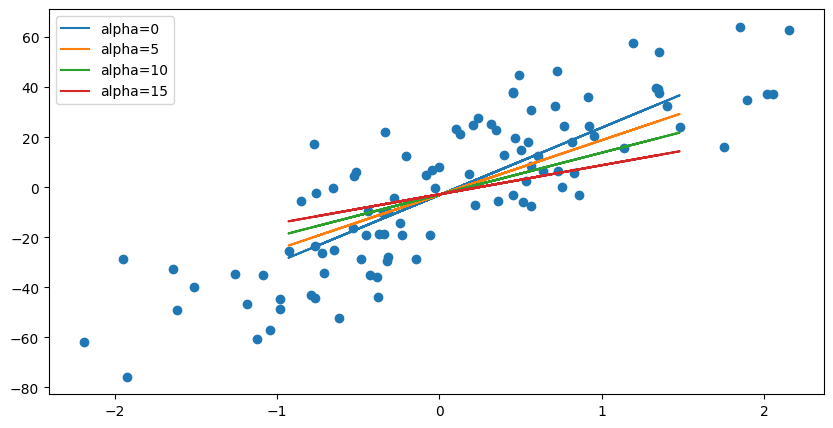

In [ ]:
alphas = [0,5,10,15]
plt.figure(figsize=(10,5))
plt.scatter(X,y)
for i in alphas:
  L = Lasso(alpha=i)
  L.fit(X_train,y_train)
  plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

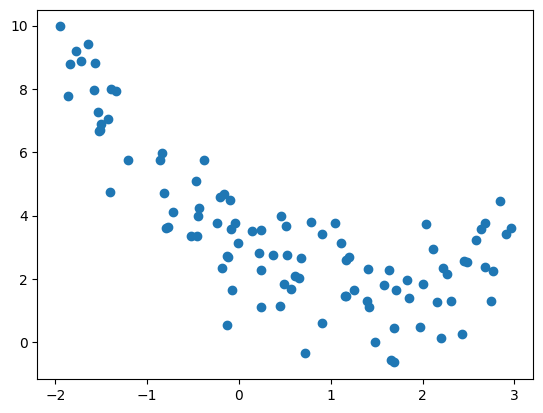

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)
plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.493e+01, tolerance: 5.794e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

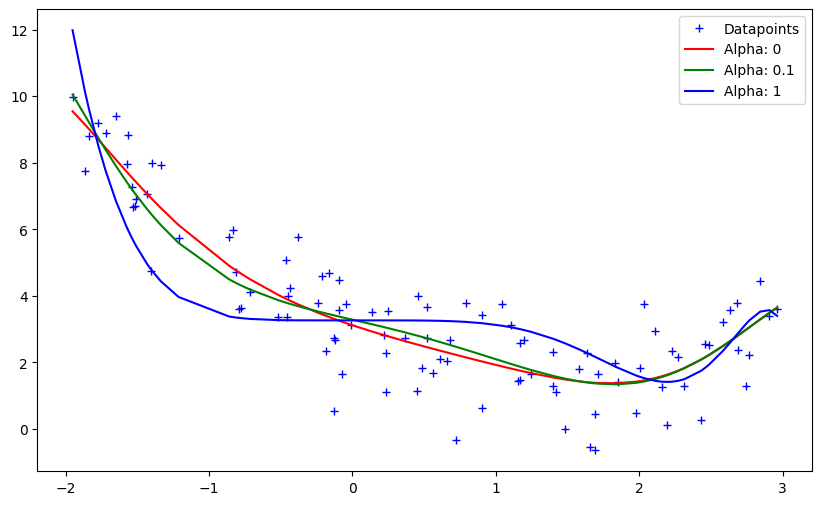

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
def get_preds_lasso(x1, x2, alpha):
  model = Pipeline([
  ('poly_feats', PolynomialFeatures(degree=16)),
  ('lasso', Lasso(alpha=alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')
for alpha, c in zip(alphas, cs):
  preds = get_preds_lasso(x1, x2, alpha)
  # Plot
  plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
plt.legend()
plt.show()

# **Logistic Regression**

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = sns.load_dataset('iris')
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [ ]:
df = df[['sepal_length','petal_length','species']]
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


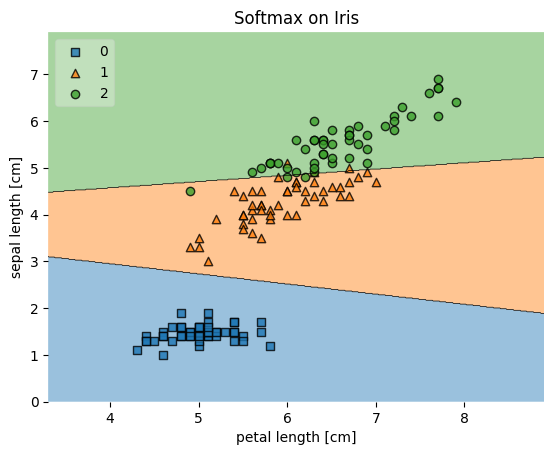

In [ ]:
plot_decision_regions(X.values, y.values, clf, legend=2)
# Adding axes annotations
plt.ylabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()